### Generic function that generates the model for an arbitrary model ; i.e. any numbers of layers and any numbers of neurons per layers

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# sigmoid function and its derivative -- the derivative assumed that the value of the function is given
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [3]:
def run(a1,y,alpha,n_neurons,la=0,niter=1000):
    '''
    a1= input dataset
    y = output dataset
    alpha = learning parameter for the gradient descent
    n_neurons = a table with the number of neurons per hidden layers
    la = the lambde for the regularization
    niter = number of iteration of the gradient descent
    '''
    
    # the first paragraph is related to generate randomly the initial weights
    syn = [2*np.random.random((2,n_neurons[0])) - 1 ]
    i=0
    for i in range(len(n_neurons)-1):
        syn.append(2*np.random.random((n_neurons[i],n_neurons[i+1])) - 1)
    if len(n_neurons)>1:
        i+=1
    syn.append(2*np.random.random((n_neurons[i],1)) - 1)

   
    ns=len(syn) #number of "inter-layers"
    ntest=len(y) #number of observations
    error1=np.zeros((niter))

    for i in range(niter):
        der = [] #will contain the derivatives of J with respect to the weights 
        for k in  range(ns):
            der.append(np.zeros(syn[k].shape))

        for j in range(ntest):#loop on all the observations from the test sample
            # forward propagation
            l=[np.array([a1[j,:]])] 

            for k in range(ns):
                l.append(nonlin(np.dot(l[-1],syn[k])))
            

            err=l[-1]-y[j]
            error1[i]+= np.dot(err,err)

            # backpropagation
            D= err*nonlin(l[-1],deriv=True)
            
            for k in range(ns-1,-1,-1):
                der[k] +=l[k].T.dot(D)
                D = D.dot(syn[k].T)*nonlin(l[k],deriv=True)
        
        #update of the weights ; the second term is the regularization
        for k in range(ns):
            syn[k]-=alpha*(der[k]/ntest + la*syn[k])

    a=a1
    # evaluation
    # forward propagation
    for k in range(ns):
        z = np.matmul(a,syn[k])
        a = nonlin(z)
    
    return np.sqrt(error1),a,syn

### The XOR function

In [4]:
# First... the well known XOR function

# the standard input
a1 = np.array([[1.,1.],[0.,0.],[1.,0.],[0.,1.]])
y = np.array([[0.],[0.],[1.],[1.]])

# one hidden layer with 3 neurons
n_neurons=[3]

s=run(a1,y,10.,n_neurons,niter=10000)

('Results:', array([[ 0.01766513],
       [ 0.01408591],
       [ 0.98152671],
       [ 0.97793371]]))


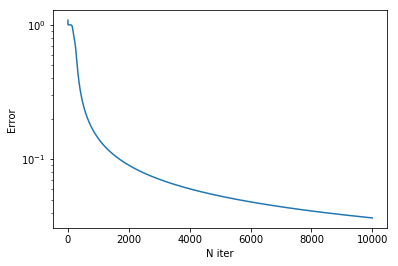

In [5]:
print('Results:' ,s[1])
plt.semilogy(s[0])
plt.xlabel('N iter')
plt.ylabel('Error')
plt.show()

### Now a simple interpolation... that is not really working

The function we are going to interpolate is a function of 2 variables $(x_1,x_2)\rightarrow y=x_1^2+x_2^2$.
First: we generate a training set, i.e. we randomly generate ntest couples of values $(x_1,x_2)$ then we compute the corresponding output values $y$.

The next step is to scale all these 3 vectors so that they take values between 0 and 1

In [6]:
# Input test
ntest=1000

x=np.random.rand(ntest,2)
y=x[:,0]**2+x[:,1]**2

#scaling
X=x

mix1=np.min(X[:,0])
max1=np.max(X[:,0])
X[:,0]= (X[:,0]-mix1)/(max1-mix1)

mix2=np.min(X[:,1])
max2=np.max(X[:,1])
X[:,1]= (X[:,1]-mix2)/(max2-mix2)

miy=np.min(y)
may=np.max(y)
Y= np.array([(y-miy)/(may-miy)]).T

In [7]:
# Here we chose the model (numbers of neurons per layers), alpha, lambda and we run it
n_neurons=[7,2]
s=run(X,Y,10.,n_neurons,niter=5000)

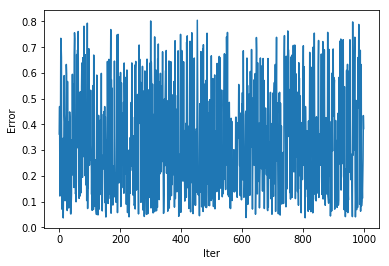

In [8]:
plt.plot(s[1])
plt.xlabel('Iter')
plt.ylabel('Error')
plt.show()

Now we will generate a set of data to evaluate our model on. These data are chosen such that they can be represented on a 2D-plot, i.e. $x_1=x_2$ 

In [9]:
# new data
xdat=np.linspace(0,1,10)
xdat=np.array([xdat,xdat]).T
ydat=xdat[:,0]**2+xdat[:,1]**2 # True value expected

# need to rescale the data accordingly to what has been used previously
xdat_rescaled=np.array([(xdat[:,0]-mix1)/(max1-mix1),(xdat[:,1]-mix2)/(max2-mix2)]).T

In [10]:
# evaluation of our model

syn=s[2]# a table with all the weights
a=xdat_rescaled

# predicition - forward propagation
for k in range(len(syn)):
    a = nonlin(np.matmul(a,syn[k]))
    
#since we were working in a rescaled units, we need to "unscale" them
ypred= a*(may-miy)+miy

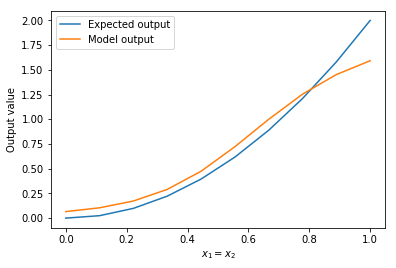

In [15]:
# and the plot 
plt.plot(xdat[:,0],ydat,xdat[:,0],ypred)
plt.legend(['True value','Model'])
plt.xlabel('$x_1=x_2$')
plt.ylabel('Output value')
plt.legend(['Expected output','Model output'])
plt.savefig('interpolation.png')
plt.show()